# Prediction of Diabetes Melitus from Patients Medical Records

### Authors: Karjout Abdeslam , Pr. Said Tkatek

# VERSION 1 : PFE

# Overview

### 1. Introduction
1.1 Background Information<br>
1.2 Libraries Used
### 2. Data Collection
2.1 Data Description <br>
2.2 Data Observations

### 3. Data Processing and Data cleaning
3.1 Processing the Data <br>
3.2 Cleaning the Data

### 4. Exploratory Data Analysis & Visualization
4.1 Histograms<br>
4.2 Analyzing Different Columns in the Dataset With Using Various Plots and Graphs<br>
&emsp;  4.2.1 Glucose<br>
&emsp;  4.2.2 Age<br>
&emsp;  4.2.3 Pregnancies<br>
&emsp;  4.2.4 Insulin<br>
&emsp;  4.2.5 Skin Thickness <br>


### 5. Machine Learning 
5.1 Dataset Preparation (Splitting and Normalization) <br>
5.2 K-Nearest Neighbors (KNN) <br>
5.3 Random Forest<br>
5.4 Linear Discriminant Analysis (LDA) <br>


### 6. Conclusion<br>



# 1. Introduction

## 1.1 Background Information
Diabetes is one of the world's most widely known chronic diseases and poses a great threat to a person's health if not diagnosed at the right time. There are two types of diabetes, Type 1 and Type 2. Both of them have differenct causes. Type 1 diabetes results from the pancreas's failure to produce enough insulin as the body attacks the cells that produce insulin in the pancreas. Type 2 diabetes begins with insulin resistance, a condition in which cells fail to respond to insulin properly[1]. 

As of 2019, the global diabetes prevalence is estimated to be 9.3% (463 million people) and this number will be rising to 10.2% (578 million) by 2030 and 10.9% (700 million) by 2045. Moreover, one in two (50.1%) people living with diabetes do not know that they have diabetes[2]. 

Our main objective in this project is to analyse the data that we collected to predict whether a person is diabetic or not. Furthermore we will also use several Machine Learining techniques to help us achieve our goal. Conducting this analysis is very important as 9.3% is a significant portion of the world's adult population. Observing the trends and data patterns related to diabetes might make it easier for us to predict whether people are diabetic or not.


## 1.2 Libraries Used
#### We wilil use the following libraries in the project:
1. pandas
2. numpy
3. matplotlib
4. seaborn
5. sklearn
6. scipy

# 2. Data Collection

This is the data collection stage of the data life cycle. During this phase, we primarily focus on collecting data from websites or various other files necessary.

We downloaded a public dataset available on Kaggle found at https://www.kaggle.com/uciml/pima-indians-diabetes-database. This dataset is in a csv format and we imported this csv file ("database.csv") as a python dataframe with the help of the **Pandas** library to analyze.

In [1]:
## Importing the libraries needed for collecting data and for analysis
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy import stats

## 2.1 Data Description
This database was created by the National Institute of Diabetes and Digestive and Kidney Diseases. The 
participants in this survey were all Females over the age of 21 of Pima Indian Heritage.

#### Before diving into analysis, let's clarify some of the column names in our dataset about diabetic patients:
1. Pregnancies: Number of times a patient was pregnant
2. Glucose: mg/dl (Plasma glucose concentration a 2 hours in an oral glucose tolerance test)
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: this function scores how likely a patient is to get diabetes based on family history, age and so on (the output results vary between 0 and 1).
8. Age: Age (years)
9. Outcome: Class variable (0 if the patient is non-diabetic or 1 if diabetic)

#### Storing the data set


In [2]:
data = pd.read_csv('diabetes.csv')

The columns in this table are the number of Pregnancies, Glucose Levels (in mg/dl), Blood Pressure (in 
mmhg), Skin Thickness (in mm), Insulin levels (in mIU/L), Body Mass Index (BMI), DiabetesPedigreeFunction,
Age (in years) and Outcomes (0 = Negative, Non-diabetic and 1 = Positive, diabetic)

The head (first five rows) of the resulting dataframe is shown below:

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2.2 Data Observations
From the data description shown below, we know that there are 768 columns for the data. Some columns have interesting values such as the max value for pregnancies is 17. The max blood pressure is only 122 which means nobody in this surveyed data has high blood pressure. There are a lot of zero mins as well (it can be assumed that this is data that could not be collected). The diabetes pedigree function is 2.4 which is impossible as the max value it can output can be upto 1. A max BMI of 67 seems to be highly unusual as well. We will deal both these variables later but it is important to state what can be infered after we get python to describe the data.

In [4]:
#describe_data 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the information shown below, the data has 768 rows in all columns and has no null values which suggests that this database has been cleaned of NaN values before or the NaN values may have been replaced with 0 values to create the appearance of a good dataset with equally sized columns. 

Additionally the info also tells us that the column Pregnancies is of type int, the column Glucose is of type int, the column BloodPressure is of type int, the column SkinThickness is of type int, the column Insulin is of type int,the column BMI is of type float, the column DiabetesPedigreeFunction is of type float, the column Age is of type int, and finally the column Outcome is of type int as well. 

In [5]:
#data_info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 3. Data Processing and Data Cleaning

## 3.1 Processing the Data
Our main objective is to determine the some of the possible factors that cause diabetes that are made available to us from this dataset and to create machine learning models that will do this for us as well. In order to get best visual results and to understand certain visual and statistical trends we would need to split the data into two dataframes one for people who tested positive for diabetes and the other for the people that tested negative. 

We will now filter out the rows of all the people that tested positive for diabetes (denoted by outcome value 1). We will also create a separate dataframe for all those who tested negative for diabetes (denoted by outcome value 0) to identify the main differences between the people who tested positive and those who tested negative for diabetes.

By doing so, we can later visualize data for the two dataframes to try and observe trends for different variables and how they differ for people who test negative and the people who test positive.

In [6]:
# dataframe for people that tested positive for diabetes
df_positive = data[data['Outcome']==1]
df_positive.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [7]:
# dataframe for people that tested negative for diabetes
df_negative = data[data['Outcome']==0]
df_negative.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


## 3.2 Cleaning the data

As one of our goals is to create Machine Learning Models to predict if a person has diabetes or not, in order for us to accurately be able to do that we need to remove all instances of incorrect values or outliers. When we looked at the dataframe, we observed that there a lot of 0 values in the Insulin, Glucose, BloodPressure, SkinThickness and BMI. However, it is not possible for any of these values to be zero for a person. This is because all these zeros are actually missing entries. So, we will remove the 0 values for Insulin, Glucose, Blood Pressue, Skin Thickness, Insulin and BMI and replace them with the mean values for each of these columns.

We create a helper function called replace_with_mean  which will replace all the zero values in these column with the mean values for these respective columns to avoid getting inaccurate results. Note that we do not replace 0 values in the pregnancy column as this simply means that the person is not pregnant, It is not necessarily an outlier.

In [8]:
# create a helper function
def replace_with_mean(df, value, value_at):
    column_mean = df.loc[df[value] != 0, [value, value_at]].groupby(value_at).mean()
    data.loc[(df[value] == 0)&(df[value_at] == 0), value] = column_mean.iloc[0][0]
    data.loc[(df[value] == 0)&(df[value_at] == 1), value] = column_mean.iloc[1][0]

    # run the function
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
    replace_with_mean(data, col, 'Outcome')

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


Here, we see that some of the values such as the max insulin value of 846 and a diabetes pedigree function of 768 are impossible. Hence, these are outliers. We will filter our data to make sure that we eliminate these outliers. In order to do so, we will use z score values.

z score is a value assigned to every given point based on its mean and standard deviation where the mean is zero and the standard deviation is one. The further the z score is from zero, the more of an outlier it is in the dataset.

Now, we will calculate the z score values for each of the entires in the dataset. We will then look at the list of z score values and estimate a general range that they fall under. We will consider this range to be a threshold for acceptable values in the dataframe. Note that we will be using absolute z score values.

In [10]:
z = np.abs(stats.zscore(data))
print(z)

[[0.63994726 0.86401998 0.03538894 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.20547775 0.53133213 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 2.01374094 0.69664653 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.02290762 0.03538894 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.14133823 1.02727533 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.94268439 0.20070334 ... 0.47378505 0.87137393 0.73212021]]


We observe above that the z score is between -3 and 3 for this dataset. So, we will use 3 as our threshold value for the dataset to remove outliers. Hence, we will filter our dataset to a smaller subset of entries which have a zscore value in the range (-3,3).

So the below dataframe is our new 'cleaned' dataset

In [11]:
data = data[(z < 3).all(axis=1)]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               720 non-null    int64  
 1   Glucose                   720 non-null    float64
 2   BloodPressure             720 non-null    float64
 3   SkinThickness             720 non-null    float64
 4   Insulin                   720 non-null    float64
 5   BMI                       720 non-null    float64
 6   DiabetesPedigreeFunction  720 non-null    float64
 7   Age                       720 non-null    int64  
 8   Outcome                   720 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 56.2 KB


# 4. Exploratory Analysis and Data Visualization

This is the exploratory analysis and data visualization stage of the project where will plot our data to notice any inital trends and patterns in the dataset. Below, we will be using different plots for each of the variables in the dataframe to try and observe which variables actually have a correlation with a person's diabetes test result.

## 4.1 Histograms

We will first plot the histograms for all the variables that could potentially affect a person's chances of getting diabetes. We will first look at the histograms of variables for all the people in the dataframe. 

<AxesSubplot:xlabel='BMI', ylabel='Count'>

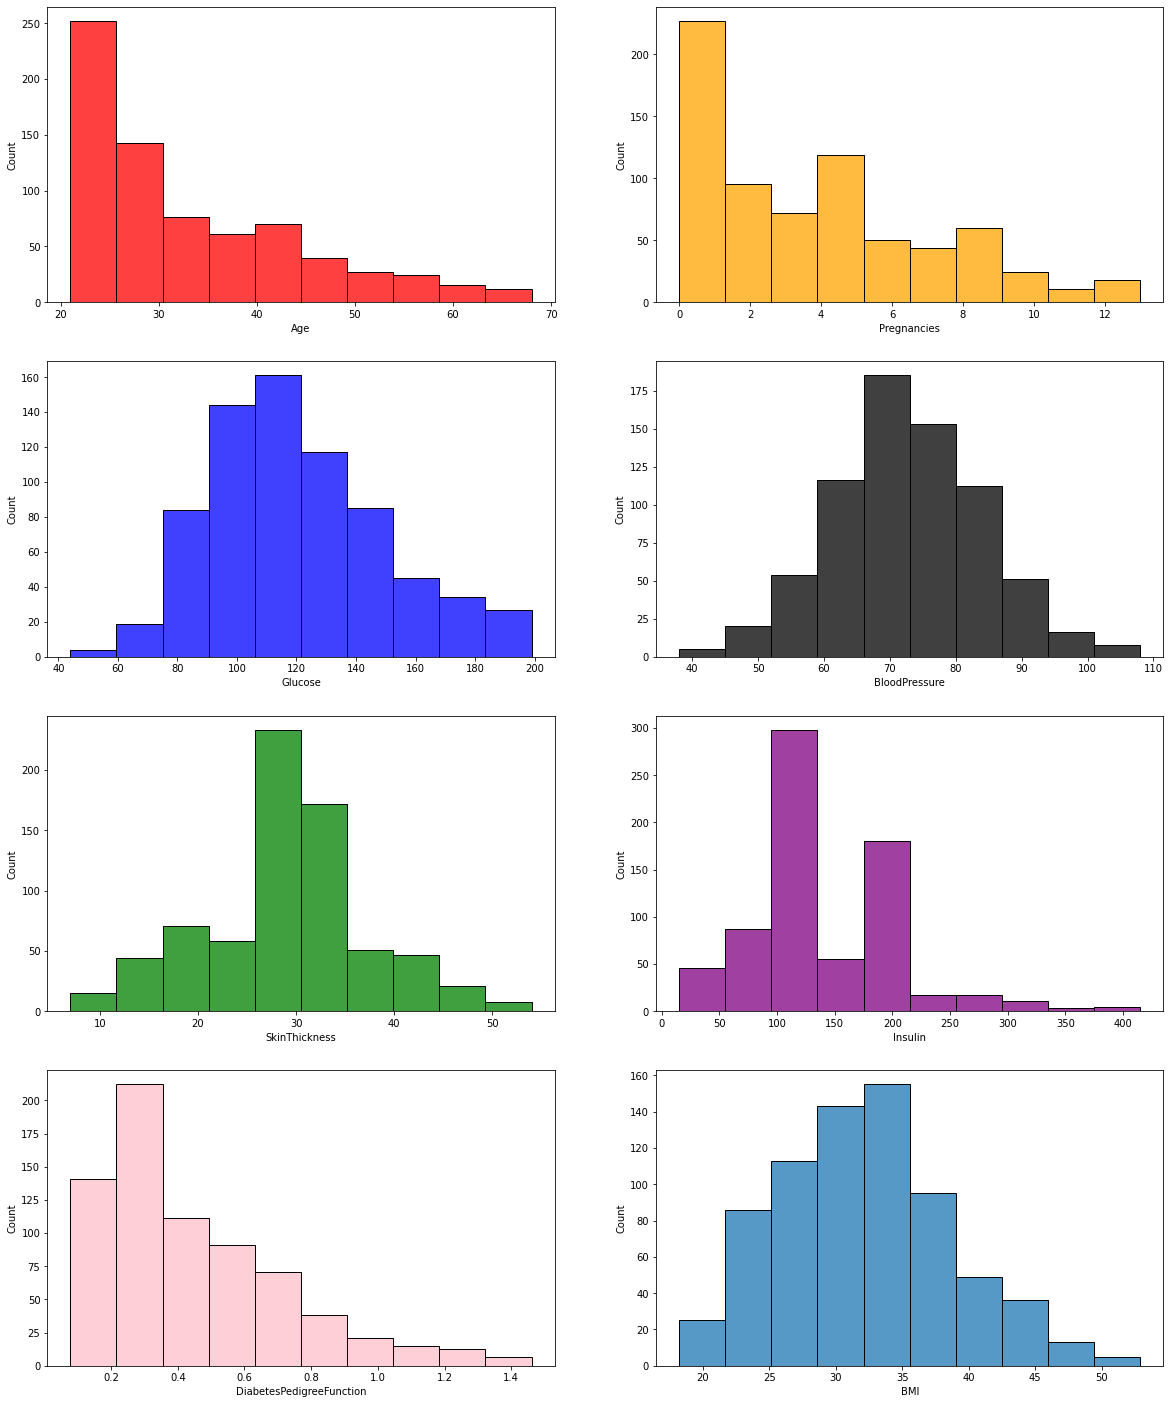

In [18]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(20,25))
sns.histplot(data.Age, bins=10, color='red', ax=ax[0, 0])
sns.histplot(data.Pregnancies, bins=10, color='orange', ax=ax[0, 1])
sns.histplot(data.Glucose, bins=10, color='blue', ax=ax[1, 0])
sns.histplot(data.BloodPressure, bins=10, color='black', ax=ax[1, 1])
sns.histplot(data.SkinThickness, bins=10, color='green', ax=ax[2, 0])
sns.histplot(data.Insulin, bins=10, color='purple', ax=ax[2, 1])
sns.histplot(data.DiabetesPedigreeFunction, bins=10, color='pink', ax=ax[3, 0])
sns.histplot(data.BMI, bins = 10, ax=ax[3,1]) 

Now, we will similarly plot histograms of the variables for only the people who tested **negative** for diabetes in the dataframe.


<AxesSubplot:xlabel='BMI', ylabel='Count'>

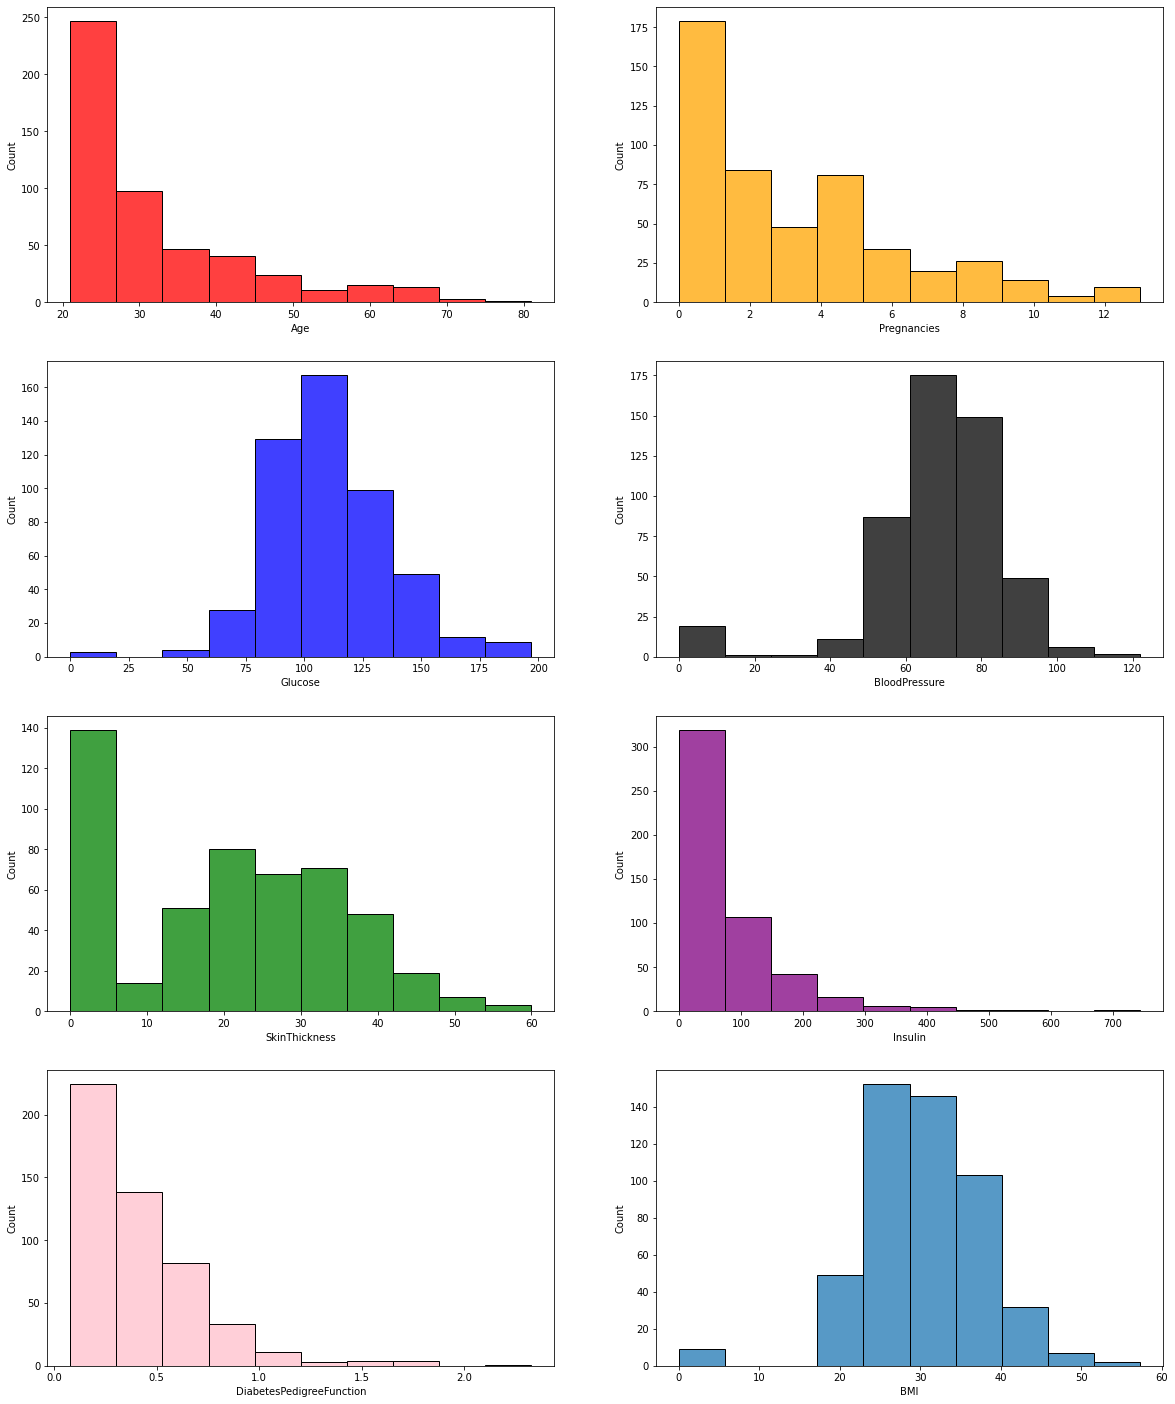

In [20]:
# Histogram and density graphs of all variables for patients who tested negative for diabetes were accessed.
fig, ax = plt.subplots(4,2, figsize=(20,25))
sns.histplot(df_negative.Age, bins=10, color='red', ax=ax[0, 0])
sns.histplot(df_negative.Pregnancies, bins=10, color='orange', ax=ax[0, 1])
sns.histplot(df_negative.Glucose, bins=10, color='blue', ax=ax[1, 0])
sns.histplot(df_negative.BloodPressure, bins=10, color='black', ax=ax[1, 1])
sns.histplot(df_negative.SkinThickness, bins=10, color='green', ax=ax[2, 0])
sns.histplot(df_negative.Insulin, bins=10, color='purple', ax=ax[2, 1])
sns.histplot(df_negative.DiabetesPedigreeFunction,
            bins=10, color='pink', ax=ax[3, 0])
sns.histplot(df_negative.BMI, bins = 10, ax=ax[3,1]) 

Finally, we will plot the histograms of variables for all the people who tested positive in the dataframe

<AxesSubplot:xlabel='BMI', ylabel='Count'>

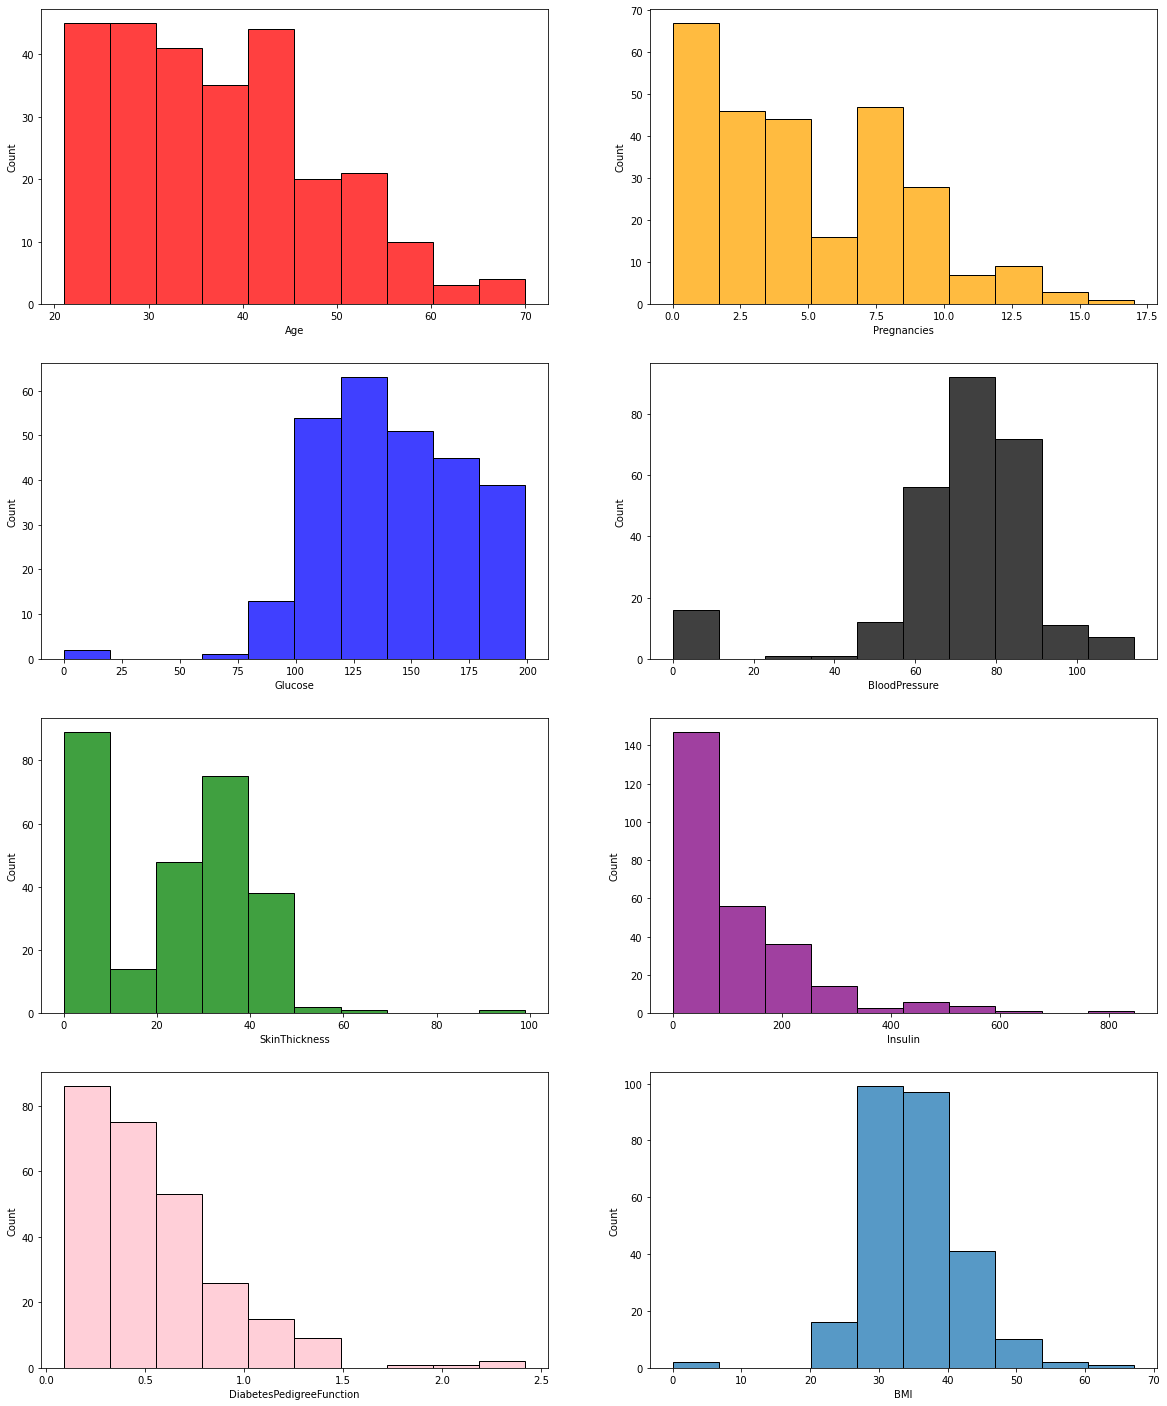

In [21]:
# Histogram and density graphs of all variables for patients who tested positive for diabetes were accessed.
fig, ax = plt.subplots(4,2, figsize=(20,25))
sns.histplot(df_positive.Age, bins=10, color='red', ax=ax[0, 0])
sns.histplot(df_positive.Pregnancies, bins=10, color='orange', ax=ax[0, 1])
sns.histplot(df_positive.Glucose, bins=10, color='blue', ax=ax[1, 0])
sns.histplot(df_positive.BloodPressure, bins=10, color='black', ax=ax[1, 1])
sns.histplot(df_positive.SkinThickness, bins=10, color='green', ax=ax[2, 0])
sns.histplot(df_positive.Insulin, bins=10, color='purple', ax=ax[2, 1])
sns.histplot(df_positive.DiabetesPedigreeFunction, bins = 10, color = 'pink', ax=ax[3,0]) 
sns.histplot(df_positive.BMI, bins = 10, ax=ax[3,1]) 

## 4.2 Analyzing Different Columns in the Dataset With the Help of Plots

## 4.2.1 Glucose
Upon comparing all the above three plots we notice something unusual about Glucose Levels. 
Shown below is the average Glucose levels for everyone in the surveyed dataset

Text(0.5, 0, 'Glucose Levels in mg/dl')

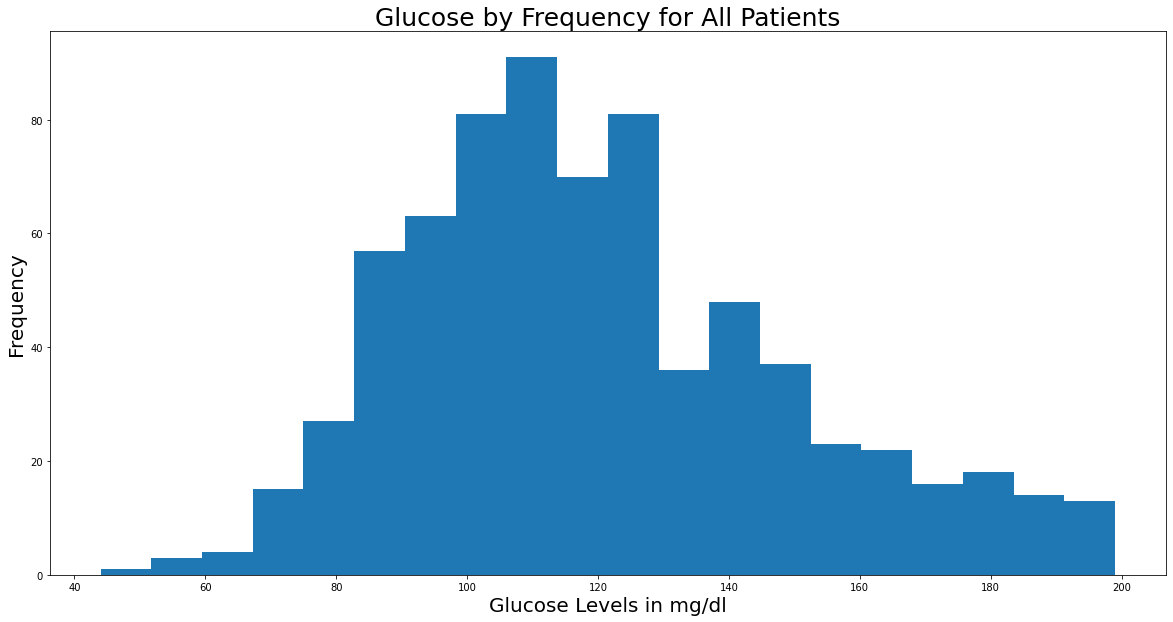

In [ ]:
plt.figure(figsize = (20, 10))
plt.hist(data['Glucose'],histtype='stepfilled',bins=20)
plt.title('Glucose by Frequency for All Patients', size = 25)
plt.ylabel('Frequency', size = 20)
plt.xlabel('Glucose Levels in mg/dl', size = 20)

The histogram below represents the glucose levels of people who tested positive for Diabetes. The majority of patients with diabetes have higher Glucose levels. Most patients have a value of around 100-125 but it slowly tapers off. Compared to the other histograms this one is definielty a lot more right leaning and thus has a lot higher values  than the table where people tested negative

Text(0.5, 0, 'Glucose Levels in mg/dl')

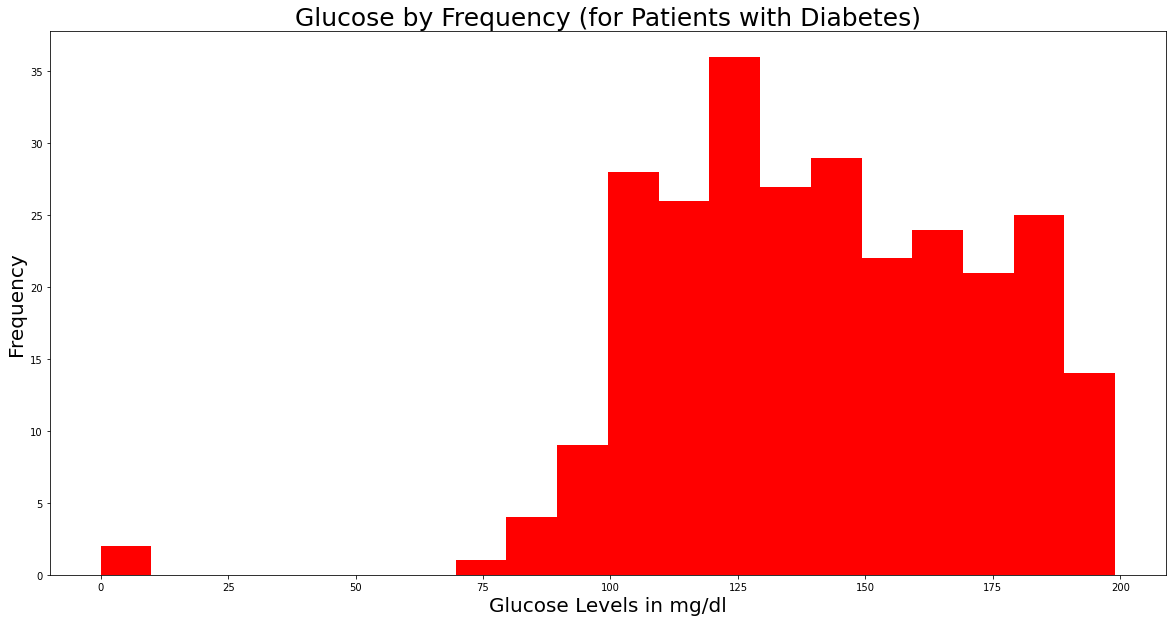

In [ ]:
plt.figure(figsize = (20, 10))
plt.hist(df_positive['Glucose'],histtype='stepfilled',bins=20, color = 'red')
plt.title('Glucose by Frequency (for Patients with Diabetes)', size = 25)
plt.ylabel('Frequency', size = 20)
plt.xlabel('Glucose Levels in mg/dl', size = 20)

The plot below represents the Glucose levels of patients with a negative test result. Most patients with a negative test result have a glucose value between 100-105 after which tapers off steeply. This conclusively shows how one is much more likely to have diabetes if they have higher glucose levels

Text(0.5, 0, 'Glucose Levels in mg/dl')

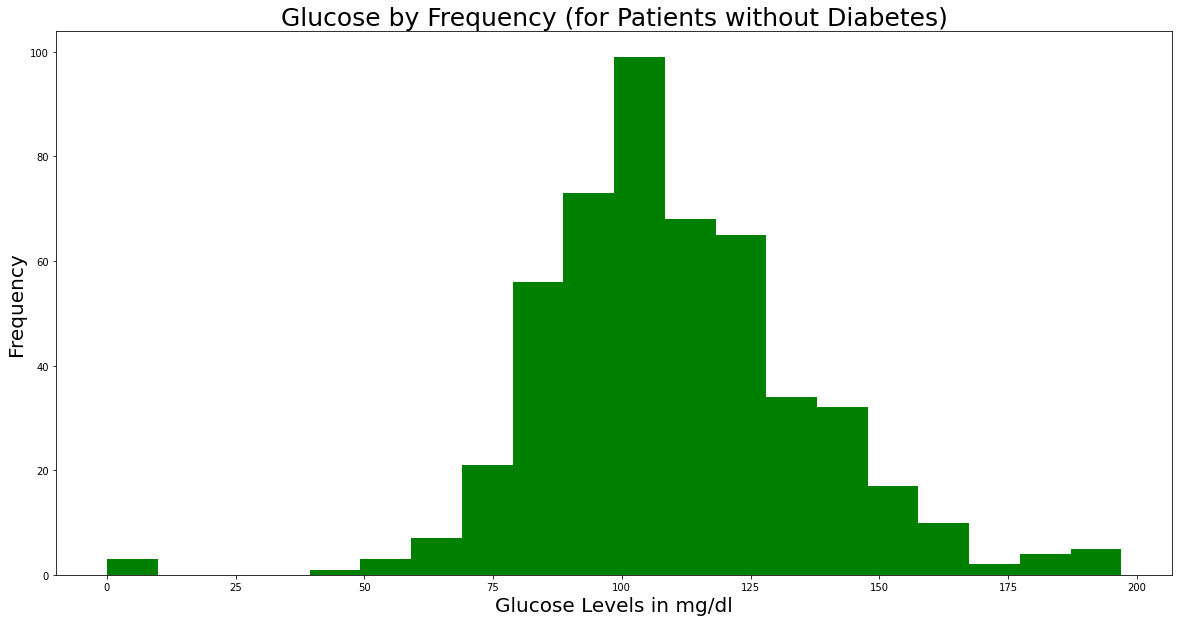

In [ ]:
plt.figure(figsize = (20, 10))
plt.hist(df_negative['Glucose'],histtype='stepfilled',bins=20, color = 'green')
plt.title('Glucose by Frequency (for Patients without Diabetes)', size = 25)
plt.ylabel('Frequency', size = 20)
plt.xlabel('Glucose Levels in mg/dl', size = 20)

## 4.2.2 Age

To check if we could observe any trends related to a person's age and her diabetic outcome, we decided to use a categorical violin plot based on a person's diabetic outcome. Here, 0 means the patient tests negative and 1 means the patients tests positive. 

Upon plotting all the ages, we see a clearly unimodal violin plot for the population that tested negative for diabetes. We would expect to see this result because younger people are less likely to get diabetes. However, the violin plot itself does not help us much because of the distribution for those who tested positive is not what we would expect. Here, we see that there is a higher density of younger people who tested positive for diabetes. So, let us delve deeper into this.

Text(0.5, 6.79999999999999, 'Outcome (0 = Non-Diabetic or 1 = Diabetic) ')

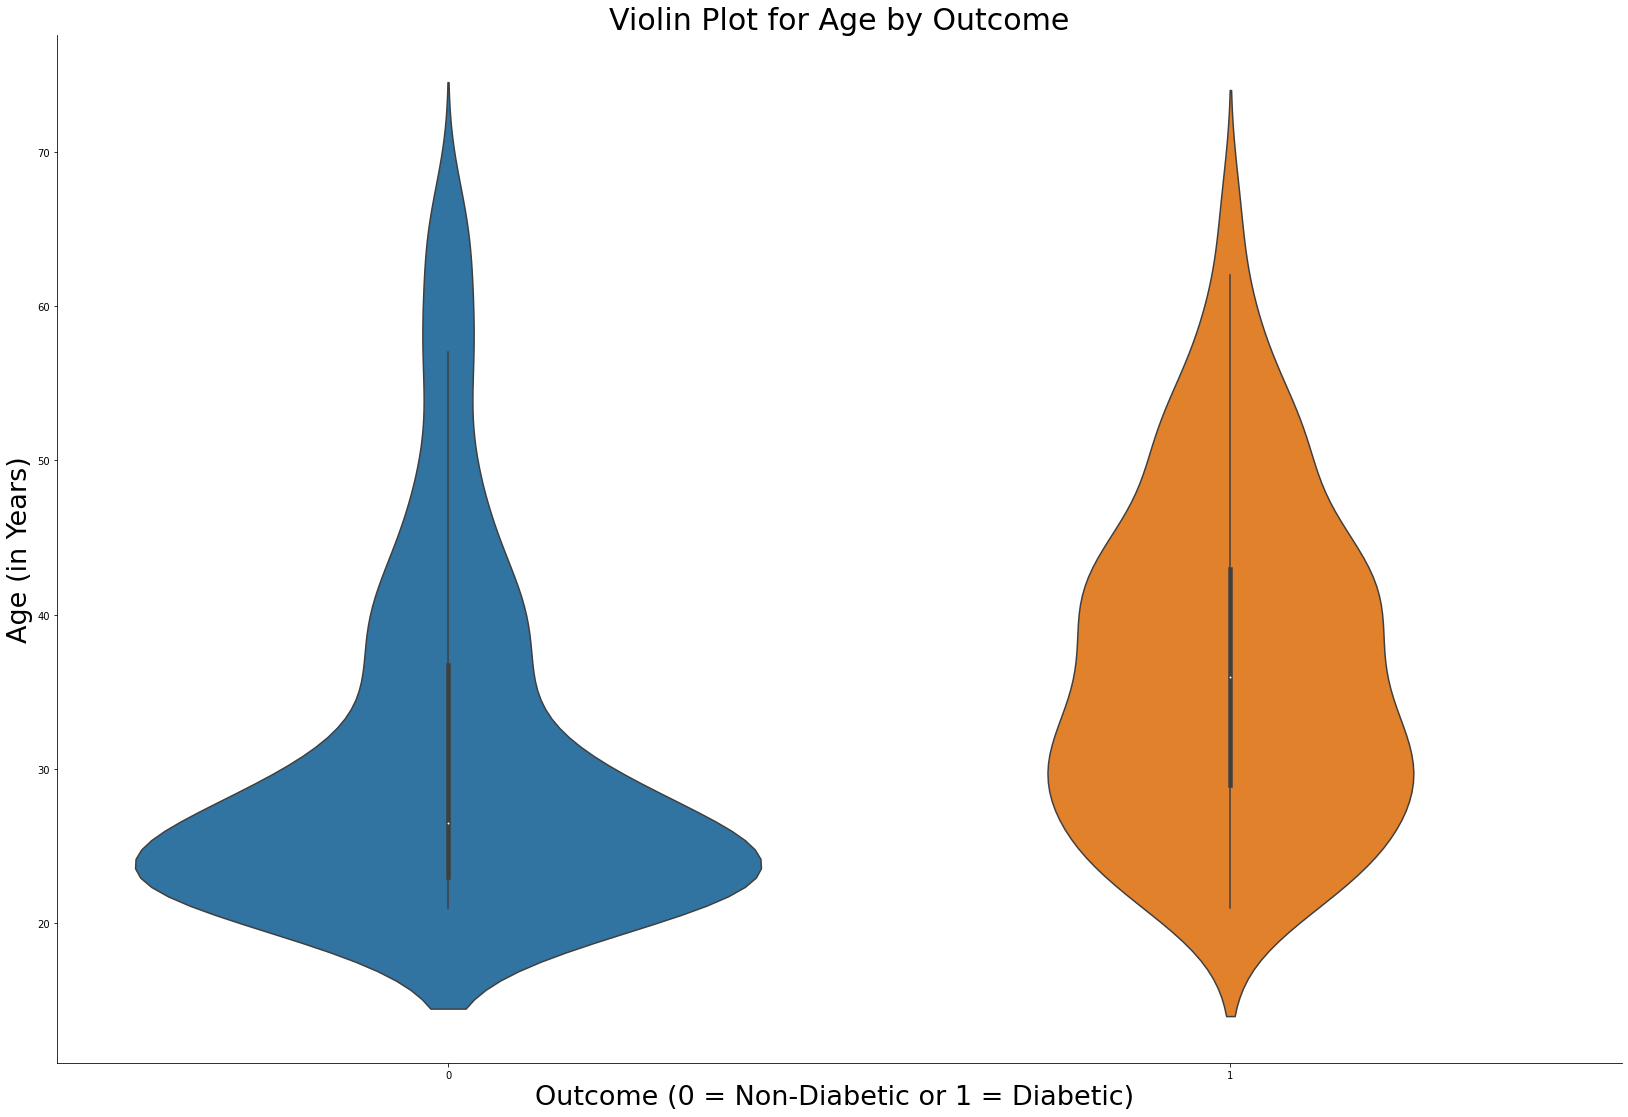

In [ ]:
sns.catplot(x="Outcome", y="Age", data = data, s = 15, height = 15, aspect = 3/2, kind = 'violin')
plt.title('Violin Plot for Age by Outcome', size = 30)
plt.ylabel('Age (in Years)', size = 27)
plt.xlabel('Outcome (0 = Non-Diabetic or 1 = Diabetic) ', size = 27)

Looking at the number of people in each age group in the dataset, it makes more sense why the violin plots look as they do. Most of the people tested are in their 20s and 30s as evidenced by the bar graphs. However, it can be seen here that a very high percentage of tested population in their 40s and 50s test positive for diabetes. 

<AxesSubplot:title={'center':'Age Groups vs Frequency'}, ylabel='age_group'>

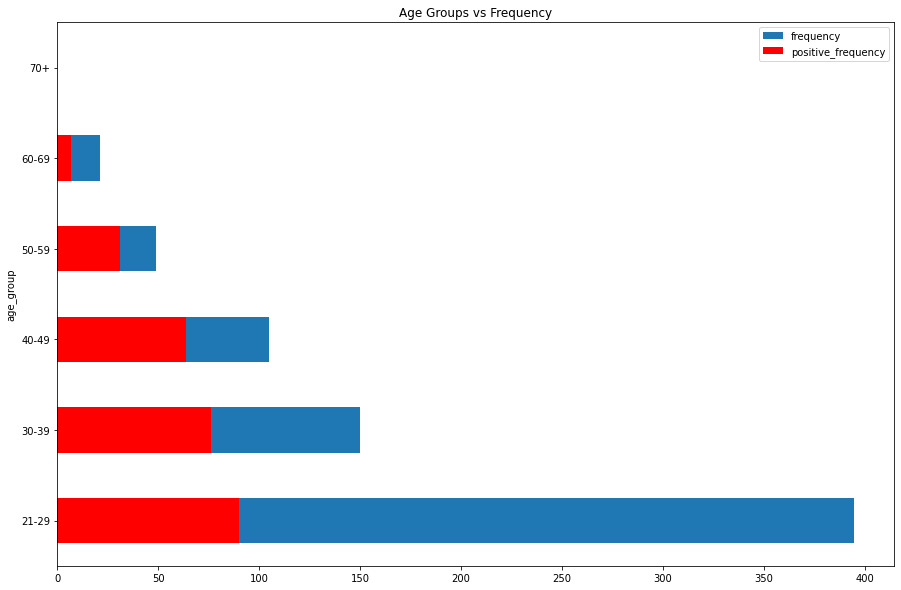

In [ ]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['21-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['agerange'] = pd.cut(data.Age, bins, labels = labels,include_lowest = True)
df_positive['agerange'] = pd.cut(df_positive.Age, bins, labels = labels,include_lowest = True)
age_groups = data.groupby('agerange')
age_groups.size()
age_frame = pd.DataFrame(age_groups.size())
age_frame = age_frame.reset_index()
age_frame.columns = ['age_group','frequency']
fig, ax = plt.subplots(figsize = (15,10))
ax.set_title('Age Groups vs Frequency')
age_frame.plot.barh(x = 'age_group', y = 'frequency', ax = ax)

age_groups_positive = df_positive.groupby('agerange')
age_frame_positive = pd.DataFrame(age_groups_positive.size())
age_frame_positive = age_frame_positive.reset_index()
age_frame_positive.columns = ['age_group','positive_frequency']
age_frame_positive.plot.barh(x = 'age_group', y = 'positive_frequency', ax = ax, color = 'red')

## 4.2.3 Pregnancies

Let us check whether pregnancies have any role to play in whether a person tests positive or negative for diabetes

From the overlay bar graph below, we see that women who get pregnant more (10-12 range) have a higher chance of testing positive for diabetes.

<AxesSubplot:title={'center':'Overaly Bar Graph for Pregnancies'}, ylabel='Pregnancies'>

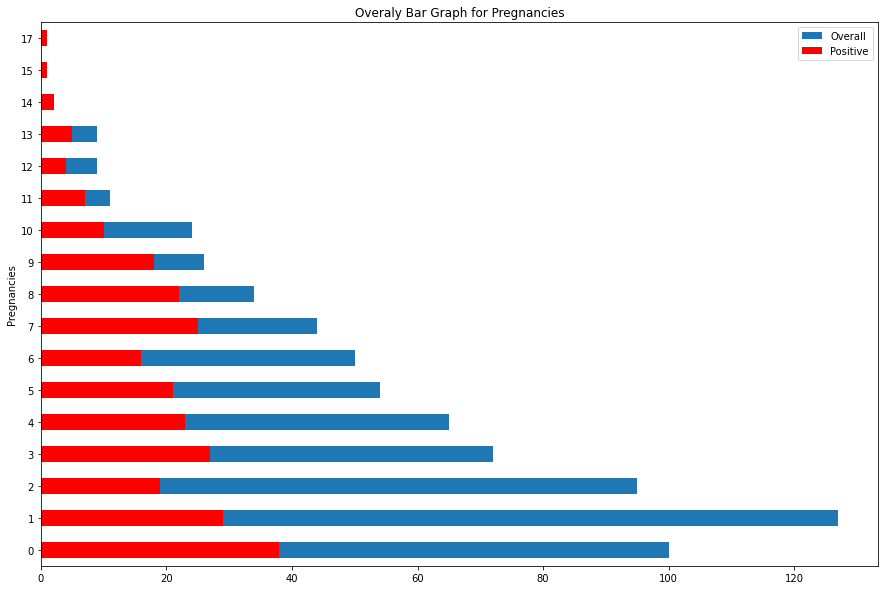

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
pregnancy_groups = data.groupby('Pregnancies')
df_pregnancies = pd.DataFrame(pregnancy_groups.size())
df_pregnancies = df_pregnancies.reset_index()
df_pregnancies.columns = ['Pregnancies', 'Overall']
ax.set_title('Overaly Bar Graph for Pregnancies')
df_pregnancies.plot.barh(x = 'Pregnancies', y = 'Overall', ax = ax)

pregnancy_groups = df_positive.groupby('Pregnancies')
df_pregnancies_positive = pd.DataFrame(pregnancy_groups.size())
df_pregnancies_positive = df_pregnancies_positive.reset_index()
df_pregnancies_positive.columns = ['Pregnancies', 'Positive']
df_pregnancies_positive.plot.barh(x = 'Pregnancies', y = 'Positive', ax = ax, color = 'red')



In [ ]:
df_positive = data[data['Outcome']==1]
df_positive.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,agerange
0,6,148.0,72.0,35.0,206.846154,33.600000,0.627,50,1,40-49
2,8,183.0,64.0,33.0,206.846154,23.300000,0.672,32,1,30-39
6,3,78.0,50.0,32.0,88.000000,31.000000,0.248,26,1,21-29
9,8,125.0,96.0,33.0,206.846154,35.406767,0.232,54,1,50-59
11,10,168.0,74.0,33.0,206.846154,38.000000,0.537,34,1,30-39


In [ ]:
df_negative = data[data['Outcome']==0]
df_negative.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,agerange
1,1,85.0,66.000000,29.000000,130.287879,26.6,0.351,31,0,30-39
3,1,89.0,66.000000,23.000000,94.000000,28.1,0.167,21,0,21-29
5,5,116.0,74.000000,27.235457,130.287879,25.6,0.201,30,0,21-29
7,10,115.0,70.877339,27.235457,130.287879,35.3,0.134,29,0,21-29
10,4,110.0,92.000000,27.235457,130.287879,37.6,0.191,30,0,21-29


## 4.2.4 Insulin 

From the histograms below, we see a huge difference in the positive and negative histograms for insulin values . Most people that test negative for Diabetes have insulin levels of around 120 mu U/ml but most of the patients with Diabetes have a value around 200 mu U/ml. This is significantly higher. Thus if you have higher insulin levels accoding to this dataset ot is more likely that you have diabetes 

Text(0.5, 0, 'Insulin Levels (mu U/ml)')

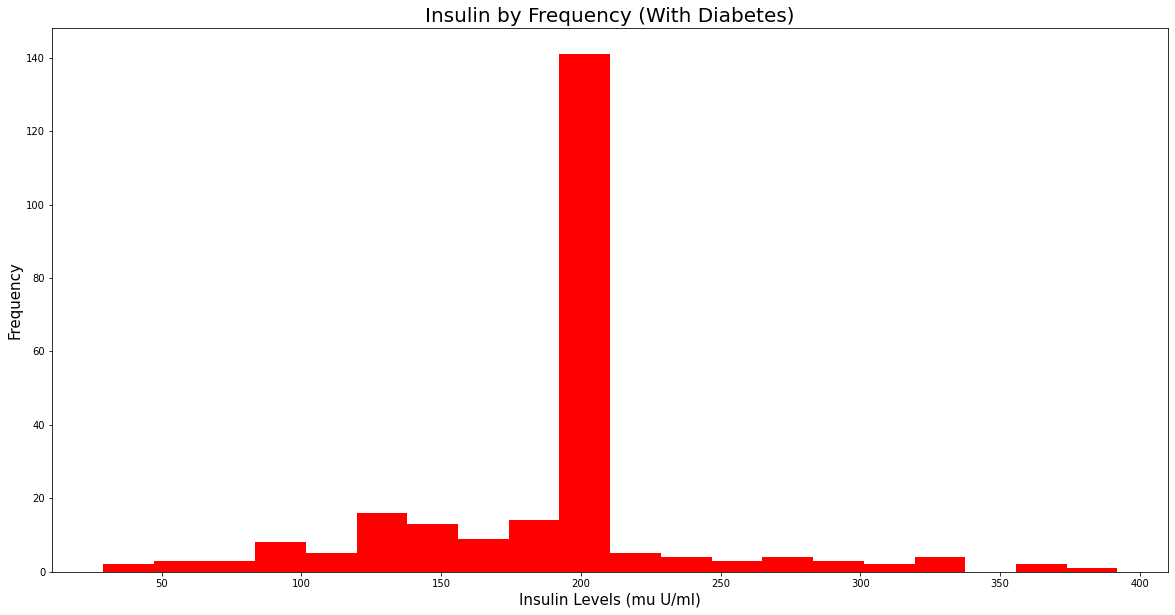

In [ ]:
plt.figure(figsize = (20, 10))
plt.hist(df_positive['Insulin'],histtype='stepfilled',bins=20, color ='red')
plt.title('Insulin by Frequency (With Diabetes)', size = 20)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Insulin Levels (mu U/ml)', size = 15)

Text(0.5, 0, 'Insulin Levels (mu U/ml)')

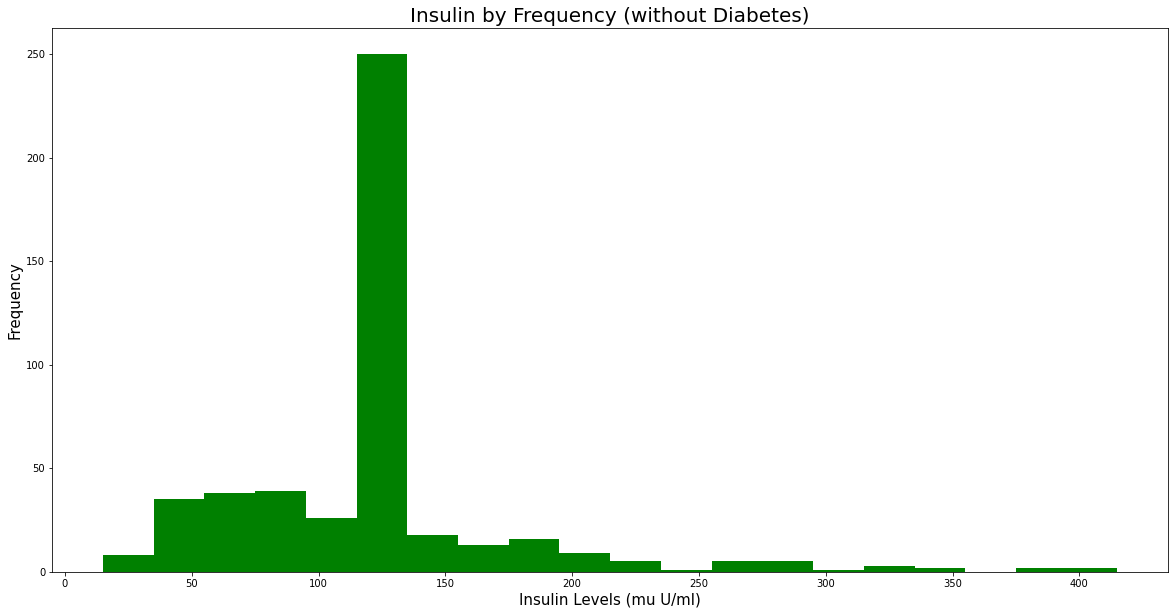

In [ ]:
plt.figure(figsize = (20, 10))
plt.hist(df_negative['Insulin'],histtype='stepfilled',bins=20, color = 'green')
plt.title('Insulin by Frequency (without Diabetes)', size = 20)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Insulin Levels (mu U/ml)', size = 15)

## 4.2.5 Skin Thickness

To check if we could observe any trends related to a person's Skin Thickness and her diabetic outcome, we decided to use a categorical violin plot based on a person's diabetic outcome. Here, 0 means the patient tests negative and 1 means the patients tests positive.

Upon plotting the skin thickness, we see a clearly unimodal violin plot for the population that tested negative and positive for diabetes. It tells us that most people with diabetes have slightly thicker skin than the poeple that don't have diabetes. 

Text(0.5, 6.79999999999999, 'Outcome')

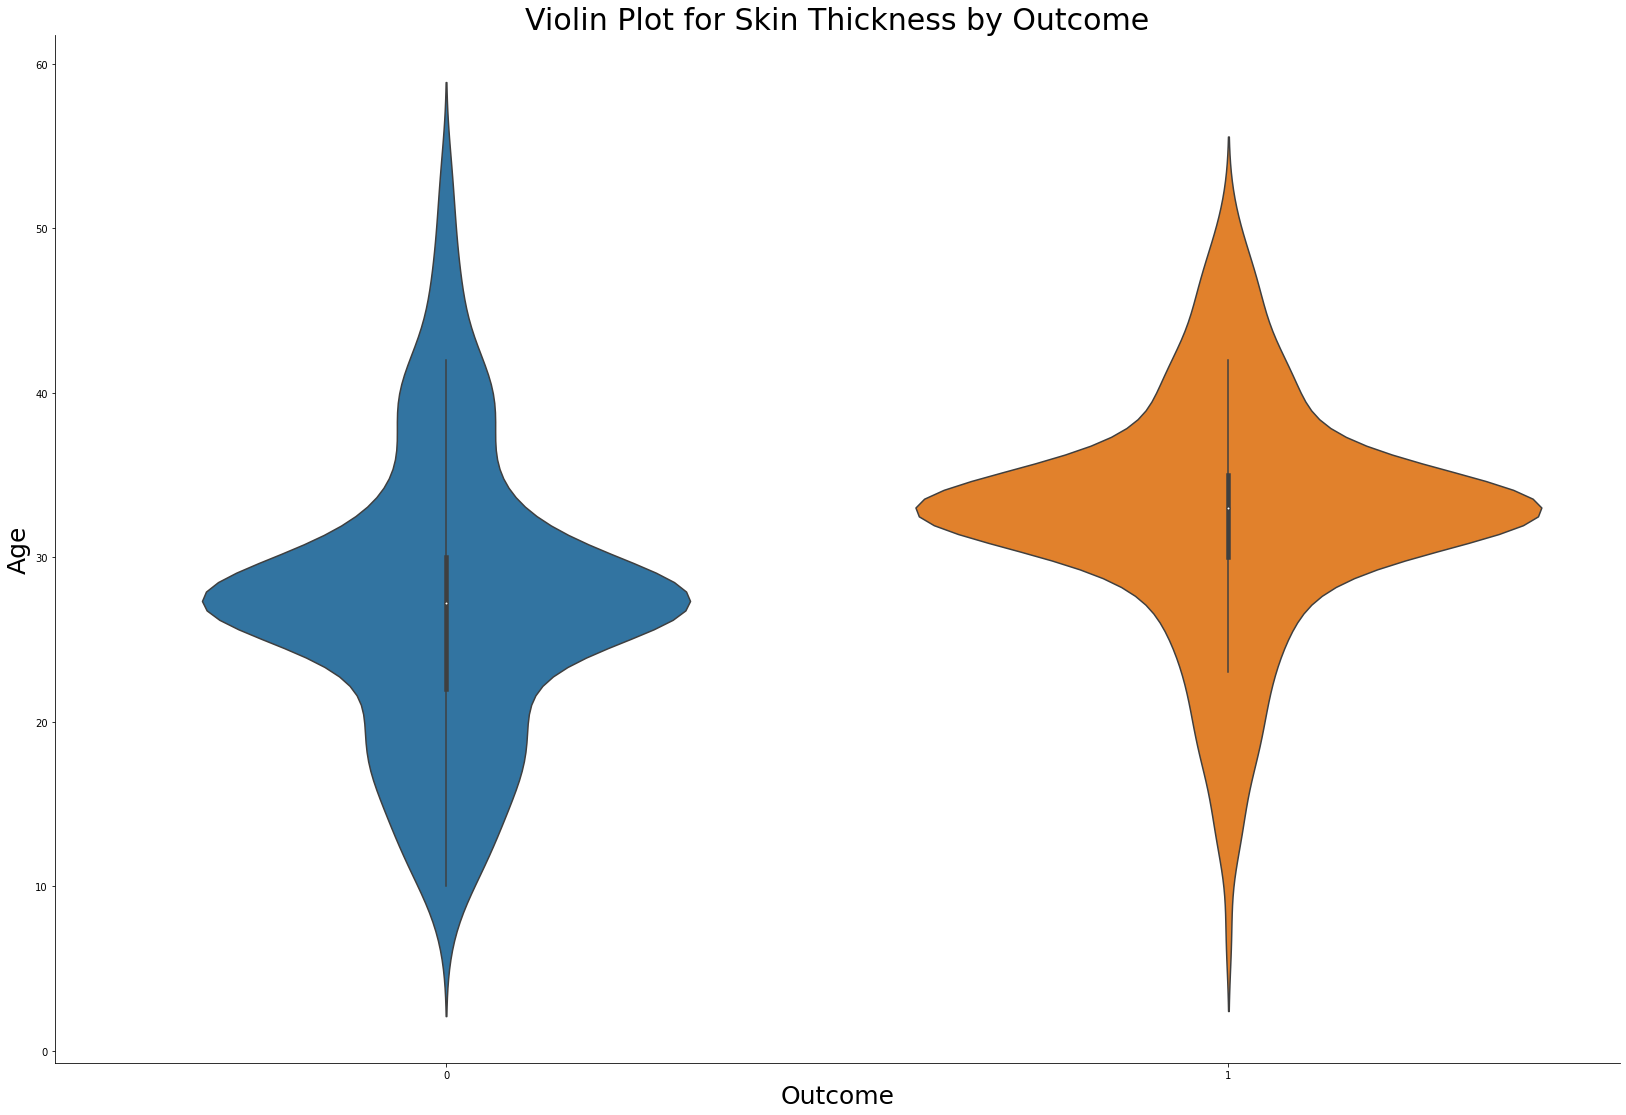

In [ ]:
sns.catplot(x="Outcome", y="SkinThickness", data = data, s = 15, height = 15, aspect = 3/2, kind = 'violin')
plt.title('Violin Plot for Skin Thickness by Outcome', size = 30)
plt.ylabel('Age', size = 25)
plt.xlabel('Outcome', size = 25)

# 5. Machine Learning

With advancements in the field of data science, Machine learning has the capabilty produce accurate results and analysis by developing data-driven models for real-time processing of datasets. So in this section, we will select the model or algorithm that performs best for our data set at hand. We will be using K-NN classification, Random Forest and Linear Discriminant Analysis (LDA) models and find out which model accurately predicts the outcome (that whether a patient is diabetic or not).


We start by importing sklearn and begin preprocessing by splitting the dataset into attributes and labels.
X has the attributes and y has the labels.

In the data set, we have the following features:<br>
1.Pregnancies <br>
2.Glucose<br>
3.Blood Pressure<br>
4.Skin Thickness<br>
5.Insulin<br>
6.BMI<br>
7.Diabetes Pedigree Function<br>
8.Age<br>

## 5.1 Dataset Preparation (Splitting and Normalization)

So we will use all the above features and separate the data set into features and the response that we're predicting. We will assign the features to the X variable and the response (the "Outcome" column)to the y variable.

We will import the necessary libraries for the notebook. We import 4 classifiers namely K-Nearest Neighbors, Random Forest Classifier, Linear Discriminant Analysis and Logistic Regression for the finding out which one is the best classifier.



In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA 
from sklearn.model_selection import train_test_split, KFold, cross_val_score

data = data.copy()
X = data.iloc[:, 1:8].values 
y = data.iloc[:, 8].values


#### Train/Test Split
We now split the data into two parts, the first part contains 80% of the data whereas the second part of the data contains the remaining 20% of the data. We do this to avoid over-fitting, the two parts are called training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. The training split gets 80% of the data and the test split has 20% of the data. Then using the train/test split, ww will calculate the accuracy of a particular model using “accuracy_score” from the sklearn.model_selection library.

In order to get better accuracy results, we will also use the k-fold cross validation method to get the accuracy of each model. The reason why we select this method is because the K-Fold cross-validation helps us to give us an estimate of a model's performance on unseen (out of sample) data and this is better technique to provide more accurate results [3].

The K-fold cross validation method splits the data set into K equal partitions (or also called folds), then use 1 fold as the testing set and the union of the other (K-1) folds as the training set. Then the model is tested for accuracy. The process will follow the above steps K times, using different folds as the testing set each time. The average testing accuracy of the process is the testing accuracy. We will train the models using 10 fold cross validation and calculate the mean accuracy of the models [4].




Split the dataset into Train/Test. Test set will not be used for model creation keep it aside!! Train set will be used for training and validation using the k-fold cross validation technique.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 60)

#### Normalizing the data
Since the range of values of varies widely, in some machine learning algorithms, the objective functions 
will not work properly without normalization. So before making any real predictions it's necessary to normalize the data. 

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Training and Predictions

In machine learning, to build a predictive model for either classification or regression tasks, a dataset is split into two different parts: training and testing. The training part is used to train the machine learning model whereas the testing part is used for predictions by the model. These predictions are then evaluated using different evaluation methods and in this project we will be using K-NN classification, Random Forest and Linear Discriminant Analysis (LDA) models.


## 5.2 K-nearest neighbors (KNN)

K-nearest neighbors (KNN) algorithm is a Machine Learning algorithm which can be used for both classification as well as regression predictive problems. KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification. KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data[5].

We first imported the KNeighborsClassifier class from the sklearn.neighbors library. We then initialize the class with one parameter i.e. n_neighbors which is basically the value for the k in kNN. For this particluar analysis, let's use 6 as the value for k.

Later on, we will fit the model and will then find out the accuracy of the model using the 10-fold cross validation method.
If we use k-fold cross validation, since our dataset is quite small, a splitting of our data into to few folds could introduce bias into our analysis and will also tell us whether the accuracy results that we get from the train/test split isn't just due to luck (since we're selecting a certain sample). 





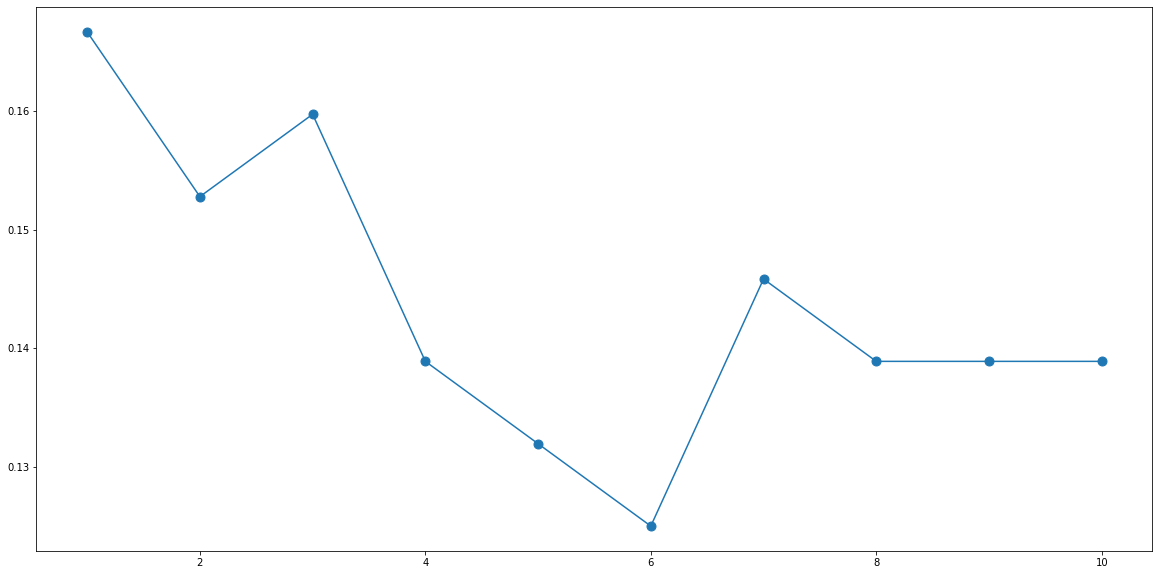

In [ ]:
# We will plot the different k values from 1 to 10 in order to select a value for k that produces minimal error
mean_error_rate = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    mean_error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(20,10))
plt.plot(range(1,11), mean_error_rate, marker='o', markersize=9)

From the plot above, we see that selecting 6 as the value for k renders minimal error.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn_classifier = KNeighborsClassifier(n_neighbors= 6) 
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print("Accuracy using for K-NN by train/test split: ", knn_classifier.score(X_test, y_test))

Accuracy using for K-NN by train/test split:  0.875


We'll be using "classification_report" to measure the quality of our predictions for each algorithm i.e. how many predictions are True and how many are False. 

Now let's define some of the terms in "classification_report" that will be used to canalyze each model[6]:<br>

**Accuracy**: Fraction (or percentage) of predictions that were correct.<br>

**Precision**: Fraction (or percentage) of correct predictions among all examples predicted to be positive, meaning what percent of our predictions were correct.<br>

**Recall**:  Fraction (or percentage) of correct predictions among all real positive examples. In simple terms, what percent of the positive cases did we catch properly.<br>
         
**F1-Score**: Weighted harmonic mean of precision and recall. In simple terms, what percent of positive predictions were correct.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       106
           1       0.79      0.71      0.75        38

    accuracy                           0.88       144
   macro avg       0.85      0.82      0.83       144
weighted avg       0.87      0.88      0.87       144



In [ ]:
# 10-fold cross validation for k-NN classification
X_val = data[['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', \
            'DiabetesPedigreeFunction', 'Age']] 
y_val = data[['Outcome']]
cv = KFold(n_splits=10, random_state= 1, shuffle = True)
cv_results = cross_val_score(knn_classifier, X_val, y_val, cv = cv, scoring ='accuracy', n_jobs= -1)
print("Accuracy for K-NN using 10-fold cross validation: %.3f" % cv_results.mean())

Accuracy for K-NN using 10-fold cross validation: 0.860


The results show that our KNN algorithm was able to classify 20% of the patient data in the test set with a 86% accuracy, which is pretty good.



## 5.3 Random Forest
Now that we saw results for kNN, now lets fit the random forest model into our dataset. Random forests are an ensemble method that Resamples the training data, builds many decision trees and averages predictions of trees to classify.

To do this, We will first import the RandomForestClassifier class from the sklearn.ensemble library. We then split our using "train_test_split". Later on, we will fit the model and will then find out the accuracy of the model using the train/test split and the 10-fold cross validation method.

In [1]:
from sklearn.ensemble import RandomForestClassifier #Random Forest

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34) 
forest_sqrt = RandomForestClassifier(n_estimators=100, random_state=0, max_features='sqrt') 
forest_sqrt.fit(X_train,y_train)

# train/test split accuracy score for Random Forests model
y_pred = forest_sqrt.predict(X_test)
print("Accuracy for Random Forest by train/test split: %.3f" % accuracy_score(y_test, y_pred))

# 10-fold cross validation for Random Forests model
cv = KFold(n_splits=10,random_state= 1, shuffle = True)
cv_results = cross_val_score(forest_sqrt, X_val, y_val, cv = cv, scoring = 'accuracy', n_jobs=-1)
print("Accuracy for Random Forest using 10-fold cross validation: %.3f" % cv_results.mean())

NameError: name 'train_test_split' is not defined

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       121
           1       0.87      0.81      0.84        59

    accuracy                           0.90       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.90      0.90      0.90       180



We see that the Random Forest model gives us the highest accuracy with the score of 88.9%. This implies that our model predicted correctly for 88.9% of the times.

## 5.4 Linear Discriminant Analysis (LDA)

Linear discriminant analysis is a supervised machine learning, the technique used to find a linear combination of features that separates two or more classes of objects or events [7]. 



In [ ]:
lda_model = LinearDiscriminantAnalysis()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = data.Outcome, random_state=60)

# train/test split accuracy score for LDA
lda_model.fit(X_train, y_train)
y_pred = lda_model.predict(X_test)
print("Accuracy for LDA by train/test split: %.3f" % accuracy_score(y_test, y_pred))

# 10-fold cross validation for Linear Discriminant Analysis (LDA)
cv = KFold(n_splits=10,random_state= 1, shuffle = True)
cv_results = cross_val_score(lda_model, X_val, y_val, cv = cv, scoring = 'accuracy', n_jobs=-1)
print("Accuracy for LDA using 10-fold cross validation: %.3f" % cv_results.mean())

Accuracy for LDA by train/test split: 0.839
Accuracy for LDA using 10-fold cross validation: 0.814


We see that the Linear Discriminant Analysis (LDA) model gives us a good accuracy with a score of 81.4%, but this isn't a better score than either KNN or the Random Forest Model

# 6. Conclusion

After plotting certain columns in the graphs, certain inferences could be made namely: The higher the glucose value the more likely a person is to have diabetes, If one's insulin levels are around 200 mu U/ml it is very likely that the patient has diabetes, The higher the number of pregnancies an individual has the higher the chances of her having diabetes and finally the older an individual gets the higher their chances of having diabetes.

From our analysis and observations of the dataset, we compared the performance of various data models and found that Random Forests performed well on our 'cleaned' dataset. We tried to understand how different altered datasets affected our results.

This dataset is not very large compared to the current diabetic population and part of the reason could be due to patient confidentiality and certain other factors. A larger dataset could give us more ground to observe trends providing a robustness in analysis. But we feel that this analysis could be applied for future applications to predict diabetes and help save patients in the future. It is also mportant to note that this survey was done solely for PIMA Indian women above the age of 21, in the future surveying of different demographics could help us compare and contrast what are the underlying causes of diabetes and find out more about how these change with gender race and other demographics such as region.


# Reference 

[1] Information about Diabetes - https://www.healthline.com/health/difference-between-type-1-and-type-2-diabetes

[2] Stats about Diabetes - https://www.diabetesresearchclinicalpractice.com/article/S0168-8227(19)31230-6/fulltext#secst005

[3] Accuracy calculation for various Machine Learning models - https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8

[4] K-fold Cross Validation Technique- https://analyticsindiamag.com/k-fold-cross-validation-and-loocv/

[5] Information about KNN - https://rapidminer.com/blog/k-nearest-neighbors-laziest-machine-learning-technique/ 

[6] https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

[7] Information about LDA- https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/

